In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist, mnist

### Fashion mnist dataset
* 6만개 학습용 데이터, 1만개 테스트용 데이터(grayscale image array)

In [54]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('train dataset shape:', train_images.shape, train_labels.shape)
print('test dataset shape:', test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


Text(0.5, 1.0, '9')

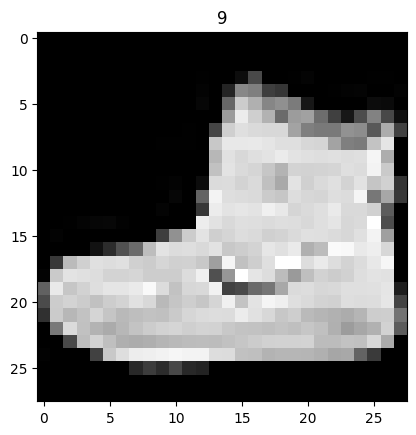

In [55]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')
# plt.axis('off')
plt.title(train_labels[0])

In [56]:
train_images[0, :, :], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

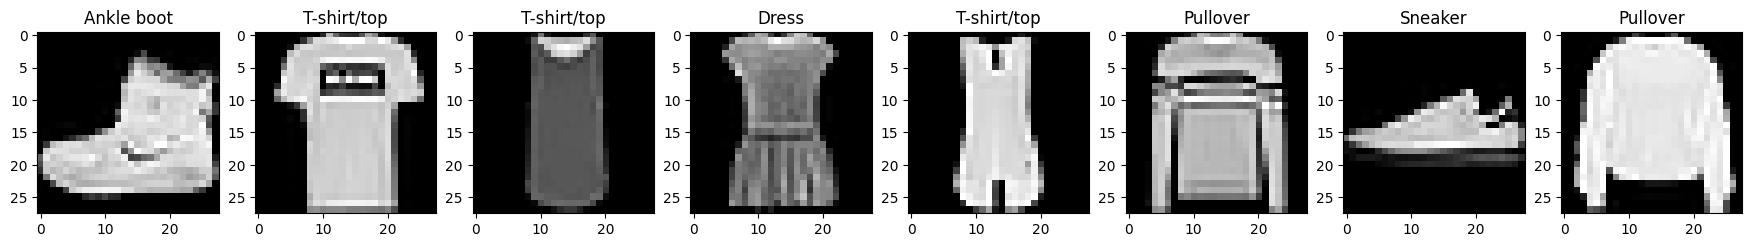

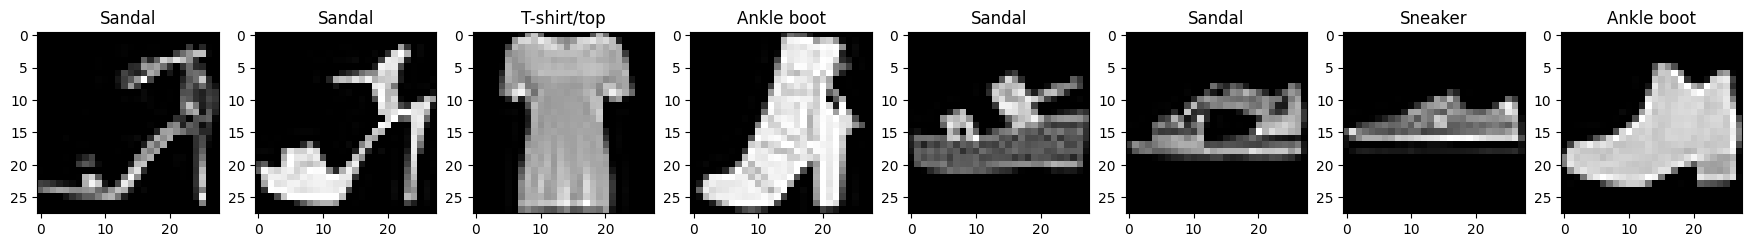

In [57]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', \
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22,6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])

show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

## 1.1 Dense Layer를 기반으로 모델을 생성

In [58]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [59]:
INPUT_SIZE = 28
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'), # param의 수 =>({28*28)+1(bias값)*100(dense값)
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 30)                3030      
                                                                 
 dense_9 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [60]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [62]:
train_images.shape

(60000, 28, 28)

In [63]:
# verbose = 0: 수행내용 출력 안함, 1: 자세히 출력함, 2: 축약된 정보 출력함
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2641 - accuracy: 0.3525
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3127 - accuracy: 0.5124
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9748 - accuracy: 0.6096
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8144 - accuracy: 0.6705
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7446 - accuracy: 0.6956
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6896 - accuracy: 0.7184
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6019 - accuracy: 0.7712
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5411 - accuracy: 0.8020
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5227 - accuracy: 0.8128
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.499

In [64]:
history.history

{'loss': [2.2640607357025146,
  1.3127003908157349,
  0.9747614860534668,
  0.8144347071647644,
  0.744619607925415,
  0.6896264553070068,
  0.6019357442855835,
  0.5411253571510315,
  0.5227099061012268,
  0.4998883605003357,
  0.4853413701057434,
  0.47722357511520386,
  0.4713400602340698,
  0.45567142963409424,
  0.4465196430683136,
  0.43395090103149414,
  0.4235278069972992,
  0.41622233390808105,
  0.4177035987377167,
  0.41107985377311707],
 'accuracy': [0.3525499999523163,
  0.5123999714851379,
  0.6095666885375977,
  0.6705499887466431,
  0.6955500245094299,
  0.7183666825294495,
  0.7712000012397766,
  0.8020166754722595,
  0.812833309173584,
  0.8177833557128906,
  0.8212666511535645,
  0.8228166699409485,
  0.826449990272522,
  0.8315333127975464,
  0.8330333232879639,
  0.8369500041007996,
  0.8371999859809875,
  0.8406500220298767,
  0.8410333395004272,
  0.8413000106811523]}

In [65]:
print(history.history['loss'])
print(history.history['accuracy'])

[2.2640607357025146, 1.3127003908157349, 0.9747614860534668, 0.8144347071647644, 0.744619607925415, 0.6896264553070068, 0.6019357442855835, 0.5411253571510315, 0.5227099061012268, 0.4998883605003357, 0.4853413701057434, 0.47722357511520386, 0.4713400602340698, 0.45567142963409424, 0.4465196430683136, 0.43395090103149414, 0.4235278069972992, 0.41622233390808105, 0.4177035987377167, 0.41107985377311707]
[0.3525499999523163, 0.5123999714851379, 0.6095666885375977, 0.6705499887466431, 0.6955500245094299, 0.7183666825294495, 0.7712000012397766, 0.8020166754722595, 0.812833309173584, 0.8177833557128906, 0.8212666511535645, 0.8228166699409485, 0.826449990272522, 0.8315333127975464, 0.8330333232879639, 0.8369500041007996, 0.8371999859809875, 0.8406500220298767, 0.8410333395004272, 0.8413000106811523]


#### 1.3 예측

In [66]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)

313/313 [==============================] - 1s 2ms/step
(10000, 10)


In [67]:
pred_proba[0]

array([9.0701517e-28, 3.1279756e-30, 2.7366402e-29, 1.7319592e-37,
       0.0000000e+00, 1.4679764e-02, 5.9810416e-30, 7.4659525e-03,
       4.2480752e-15, 9.7785425e-01], dtype=float32)

In [68]:
pred_proba[0].sum()

0.99999994

In [69]:
pred_proba[0].argmax()

9

In [70]:
# predict 입력값으로 2차원을 넣으면 오류가 날 수 있음
pred_proba = model.predict(test_images[0])

1/1 [==============================] - 0s 168ms/step


In [71]:
test_images[0].shape # 2차원 이미지임(height * width)

(28, 28)

In [72]:
np.expand_dims(test_images[0], axis=0).shape # 3차원으로 변환(predict에 3차원으로 늘려서 넣어주는 게 좋음)

(1, 28, 28)

In [73]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_proba) # 반환되는 값이 2차임=>[[]]

1/1 [==============================] - 0s 60ms/step
softmax output: [[9.0701863e-28 3.1279995e-30 2.7366613e-29 1.7319724e-37 0.0000000e+00
  1.4679764e-02 5.9810872e-30 7.4659525e-03 4.2480752e-15 9.7785425e-01]]


In [74]:
np.squeeze(pred_proba) # 필요없는 차원을 날려버림

array([9.0701863e-28, 3.1279995e-30, 2.7366613e-29, 1.7319724e-37,
       0.0000000e+00, 1.4679764e-02, 5.9810872e-30, 7.4659525e-03,
       4.2480752e-15, 9.7785425e-01], dtype=float32)

In [75]:
pred_proba[0] # pred_proba의 길이는 10000개임, 그 중 0번째 인덱스 값을 출력(10개의 레이블(티셔츠, 앵클부츠 등)에 대한 각각의 확률을 표시함)

array([9.0701863e-28, 3.1279995e-30, 2.7366613e-29, 1.7319724e-37,
       0.0000000e+00, 1.4679764e-02, 5.9810872e-30, 7.4659525e-03,
       4.2480752e-15, 9.7785425e-01], dtype=float32)

In [76]:
len(pred_proba[0]) # pred_proba의 0번째 값의 길이는 10개(티셔츠, 드레스, ...., 앵클부츠 등에 대한 확률)

10

In [77]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 3s 11ms/step - loss: 0.5252 - accuracy: 0.8253


[0.5251623392105103, 0.8252999782562256]

## 1.4 검증 데이터 세트를 이용한 학습 수행

In [ ]:
def get_preprocessed_data(images, labels):
    images = np.array(images/255, dtype=np.float32) # 데이터 정규화 =>minmax Scaler 사용 #이미지의 픽셀값이 0~255 사이이므로 255로 나눠서 강제로 0~1사이의 값으로 만듬
    labels = np.array(labels, dtype=np.float32) # labels의 값은 이미지가 아니라 숫자값이므로 minmax Scaler 미적용
    return images, labels

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # 데이커가 중간에 꼬였을 수도 있으므로 import부터 시작해서 새로 데이터 분리


train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [79]:
train_images[30]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [80]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, \
                                                                test_size=0.15, random_state=2021)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, \
                              val_labels.shape)
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)
print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
after OHE: (51000, 10) (9000, 10)


In [81]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
INPUT_SIZE = 28
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, \
            validation_data=(val_images, val_oh_labels), epochs=20, verbose=1)

Epoch 1/20
399/399 [==============================] - 5s 7ms/step - loss: 4.3966 - accuracy: 0.6959 - val_loss: 1.0667 - val_accuracy: 0.7542
Epoch 2/20
399/399 [==============================] - 3s 7ms/step - loss: 0.8050 - accuracy: 0.7751 - val_loss: 0.6982 - val_accuracy: 0.7942
Epoch 3/20
399/399 [==============================] - 2s 6ms/step - loss: 0.5924 - accuracy: 0.8097 - val_loss: 0.6605 - val_accuracy: 0.7961
Epoch 4/20
399/399 [==============================] - 2s 5ms/step - loss: 0.5179 - accuracy: 0.8239 - val_loss: 0.5522 - val_accuracy: 0.8234
Epoch 5/20
399/399 [==============================] - 2s 5ms/step - loss: 0.4716 - accuracy: 0.8360 - val_loss: 0.5961 - val_accuracy: 0.7992
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4457 - accuracy: 0.8434 - val_loss: 0.5092 - val_accuracy: 0.8347
Epoch 7/20
399/399 [==============================] - 2s 5ms/step - loss: 0.4246 - accuracy: 0.8479 - val_loss: 0.4986 - val_accuracy: 0.8401
Epoch 

In [84]:
history.history

{'loss': [4.3965654373168945,
  0.8049581050872803,
  0.5923933386802673,
  0.5178589224815369,
  0.47157949209213257,
  0.44569647312164307,
  0.424603134393692,
  0.40682217478752136,
  0.40117502212524414,
  0.3906368315219879,
  0.38584643602371216,
  0.37925198674201965,
  0.3645493686199188,
  0.366117924451828,
  0.37224280834198,
  0.35930243134498596,
  0.354458212852478,
  0.3543109595775604,
  0.34805142879486084,
  0.34633156657218933],
 'accuracy': [0.6958823800086975,
  0.7751176357269287,
  0.8097450733184814,
  0.8239215612411499,
  0.8359608054161072,
  0.8433529138565063,
  0.8478823304176331,
  0.8543725609779358,
  0.8553725481033325,
  0.8586666584014893,
  0.8610392212867737,
  0.8637647032737732,
  0.866745114326477,
  0.8657255172729492,
  0.8646862506866455,
  0.8707647323608398,
  0.8717647194862366,
  0.8716274499893188,
  0.8739019632339478,
  0.8732548952102661],
 'val_loss': [1.066742181777954,
  0.6982086300849915,
  0.6605275869369507,
  0.55216246843338

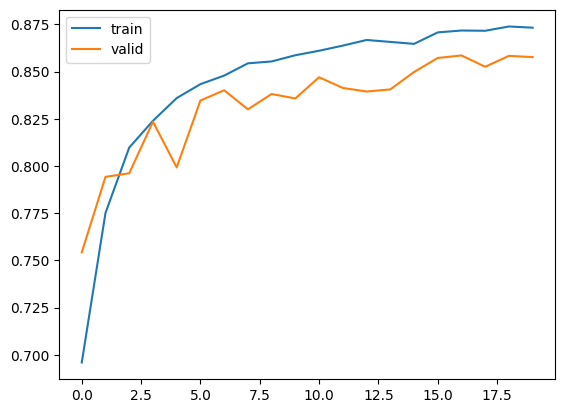

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
show_history(history)

In [86]:
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 1s 7ms/step - loss: 0.4454 - accuracy: 0.8481


[0.4453752338886261, 0.8481000065803528]